# 07wk-034: 취업(오버피팅) / 의사결정나무

최규빈  
2023-10-16

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xYMQe_6GKus4q8E6c5RNIS&si=QtTWrQUAXDgwhxBp>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 3. Data

In [3]:
def generating_df(n_balance):
    df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
    df_balance = pd.DataFrame((np.random.randn(500,n_balance)).reshape(500,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)])
    return pd.concat([df,df_balance],axis=1)

In [4]:
df = generating_df(10)
df

,toeic,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
0,135,0.051535,0,0.597081,-0.035129,0.854562,0.786060,-0.418987,0.656819,1.054650,-0.583549,-0.801648,0.275704
1,935,0.355496,0,-0.489958,0.560724,0.218998,1.053743,-0.873298,0.560064,-0.337398,1.580405,0.859627,-1.225685
2,485,2.228435,0,0.195608,0.706463,1.242647,1.270597,0.065658,0.176606,-0.496860,-0.814525,0.019076,-0.206196
3,65,1.179701,0,-0.417740,-1.653030,-0.420448,1.585880,-0.817104,-1.324694,-0.803614,-0.677855,-0.148533,2.723495
4,445,3.962356,1,0.040684,1.544578,-0.688206,0.120899,0.765603,0.213922,-0.753956,-0.720528,0.569866,-0.540689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,280,4.288465,1,0.036820,-0.774982,-0.862066,0.456921,0.443886,0.951077,-1.661479,-0.718166,-0.009465,1.320969
496,310,2.601212,1,-0.021882,-1.008259,1.126976,0.201097,-0.014282,0.076847,1.394790,-1.216803,-0.618279,0.732187
497,225,0.042323,0,-0.457187,-0.366491,0.217539,-1.248033,0.751056,0.309329,0.143768,-0.818435,1.152402,0.582863
498,320,1.041416,0,1.342974,-0.123772,0.908135,0.240395,0.177500,-0.386220,-0.569122,-0.742096,-0.010123,-1.268964


In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [6]:
X,y = df_train.drop(['employment'],axis=1), df_train['employment']
XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']

# 4. 분석

`-` 분석1: 의사결정나무

In [7]:
## step1 -- pass
## step2 
predictr = sklearn.tree.DecisionTreeClassifier(random_state=42)
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 1.0000
test_score = 0.7543


`-` 분석2: 로지스틱 + Ridge

In [8]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l2')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8667
test_score = 0.8829


`-` 분석3: 로지스틱 + Lasso

In [117]:
## step1 -- pass
## step2 
predictr = sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')
## step3 
predictr.fit(X,y)
## step4
df_train['employment'] = predictr.predict(X)
df_test['employment'] = predictr.predict(XX)
#--#
print(f'train_score = {predictr.score(X,y):.4f}')
print(f'test_score = {predictr.score(XX,yy):.4f}')

train_score = 0.8667
test_score = 0.8857

# 5. 연구

`-` Balance 변수들의 수가 커짐에 따라서 각 방법들(의사결정나무,
로지스틱+Ridge, 로지스틱+Lasso)의 train/test score는 어떻게 변화할까?

`-` df, predictor -\> train_score, test_score 와 같은 함수를 만들자.

In [9]:
def anal(df,predictr):
    df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)
    X,y = df_train.drop(['employment'],axis=1), df_train['employment']
    XX,yy = df_test.drop(['employment'],axis=1), df_test['employment']
    ## step1 -- pass
    ## step2 -- pass 
    ## step3 
    predictr.fit(X,y)
    ## step4 -- pass 
    #--#
    return predictr.score(X,y),predictr.score(XX,yy)

In [10]:
predictr = sklearn.tree.DecisionTreeClassifier()

In [11]:
anal(df,predictr)

(1.0, 0.7514285714285714)

`-` 실험해보자.

In [12]:
n_balance_lst = range(0,5000,50)

In [13]:
predictrs = [sklearn.tree.DecisionTreeClassifier(random_state=42),
             sklearn.linear_model.LogisticRegressionCV(penalty='l2'),
             sklearn.linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')]

In [14]:
lst = [[anal(generating_df(n_balance),predictr) for predictr in predictrs] for n_balance in n_balance_lst]

`-` 실험결과 정리

In [15]:
arr = np.array(lst)
tr = arr[:,:,0]
tst = arr[:,:,1]

In [25]:
df1= pd.DataFrame(tr,columns=['tree','ridge','lasso']).eval('dataset = "train"').eval('n_balance = @n_balance_lst')
df2= pd.DataFrame(tst,columns=['tree','ridge','lasso']).eval('dataset = "test"').eval('n_balance = @n_balance_lst')
result_df = pd.concat([df1,df2]).set_index(['dataset','n_balance']).stack().reset_index().set_axis(['dataset','n_balance','method','score'],axis=1)

In [28]:
sns.lineplot(result_df.query('dataset=="test"'),x='n_balance',y='score',hue='method')

TypeError: lineplot() got multiple values for argument 'x'

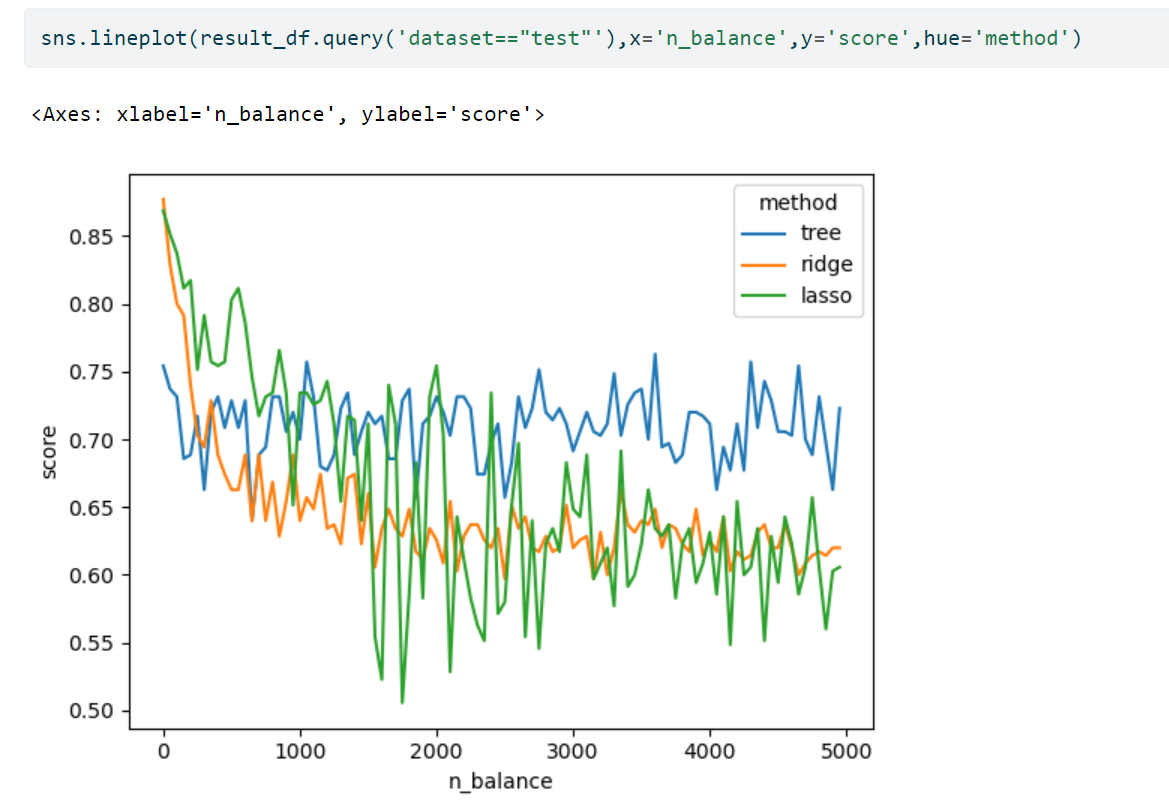